<p style="text-align:center;color:green;font-size:40px;"><b>SQL Project on Hospital Management</b></p>

<p style="text-align:left;color:blue;font-size:20px;"><b>This project involves performing data analysis using SQL queries on a hospital management system dataset. The data includes multiple tables: Appointments, Doctors, Patients, Treatments, and Billing.</b></p>

<p style="text-align:left;color:orange;font-size:33px;"><b>Loading and Preprocessing the Data</b></p>

In [1]:
import pandas as pd
import numpy as np

In [2]:
appointment = pd.read_csv('appointments.csv')
df_appointments = pd.DataFrame(appointment)

In [3]:
df_appointments.head()

,appointment_id,patient_id,doctor_id,appointment_date,appointment_time,reason_for_visit,status
0,A001,P034,D009,09-08-2023,15:15:00,Therapy,Scheduled
1,A002,P032,D004,09-06-2023,14:30:00,Therapy,No-show
2,A003,P048,D004,28-06-2023,08:00:00,Consultation,Cancelled
3,A004,P025,D006,01-09-2023,09:15:00,Consultation,Cancelled
4,A005,P040,D003,06-07-2023,12:45:00,Emergency,No-show


In [4]:
print(df_appointments.isnull().sum())
print(df_appointments.duplicated().sum())
print(df_appointments.dtypes)

appointment_id      0
patient_id          0
doctor_id           0
appointment_date    0
appointment_time    0
reason_for_visit    0
status              0
dtype: int64
0
appointment_id      object
patient_id          object
doctor_id           object
appointment_date    object
appointment_time    object
reason_for_visit    object
status              object
dtype: object


In [5]:
df_appointments['appointment_datetime'] = pd.to_datetime(df_appointments['appointment_date'].astype(str) + ' ' + df_appointments['appointment_time'].astype(str), format =   '%d-%m-%Y %H:%M:%S')

In [6]:
df_appointments.drop(['appointment_date', 'appointment_time'], axis = 1, inplace = True)

In [7]:
df_appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   appointment_id        200 non-null    object        
 1   patient_id            200 non-null    object        
 2   doctor_id             200 non-null    object        
 3   reason_for_visit      200 non-null    object        
 4   status                200 non-null    object        
 5   appointment_datetime  200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.5+ KB


In [8]:
df_appointments.describe()

,appointment_datetime
count,200
mean,2023-06-18 00:34:57
min,2023-01-01 14:00:00
25%,2023-03-28 06:33:45
50%,2023-06-10 13:52:30
75%,2023-09-15 21:00:00
max,2023-12-30 10:15:00


In [9]:
#df_appointments.to_csv("Appointments_cleaned.csv",index=False)

In [10]:
billing = pd.read_csv('billing.csv')
df_billing = pd.DataFrame(billing)

In [11]:
df_billing.head()

,bill_id,patient_id,treatment_id,bill_date,amount,payment_method,payment_status
0,B001,P034,T001,09-08-2023,3941.97,Insurance,Pending
1,B002,P032,T002,09-06-2023,4158.44,Insurance,Paid
2,B003,P048,T003,28-06-2023,3731.55,Insurance,Paid
3,B004,P025,T004,01-09-2023,4799.86,Insurance,Failed
4,B005,P040,T005,06-07-2023,582.05,Credit Card,Pending


In [12]:
print(df_billing.isnull().sum())
print(df_billing.duplicated().sum())
print(df_billing.dtypes)

bill_id           0
patient_id        0
treatment_id      0
bill_date         0
amount            0
payment_method    0
payment_status    0
dtype: int64
0
bill_id            object
patient_id         object
treatment_id       object
bill_date          object
amount            float64
payment_method     object
payment_status     object
dtype: object


In [13]:
df_billing['bill_date'] = pd.to_datetime(df_billing['bill_date'], format = '%d-%m-%Y')

In [14]:
print(df_billing['bill_date'].isnull().sum())

0


In [15]:
df_billing.describe()

,bill_date,amount
count,200,200.000000
mean,2023-06-17 11:38:24,2756.249250
min,2023-01-01 00:00:00,534.030000
25%,2023-03-27 18:00:00,1563.412500
50%,2023-06-10 00:00:00,2828.165000
75%,2023-09-15 12:00:00,3836.627500
max,2023-12-30 00:00:00,4973.630000
std,NaN,1298.125308


In [16]:
df_billing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   bill_id         200 non-null    object        
 1   patient_id      200 non-null    object        
 2   treatment_id    200 non-null    object        
 3   bill_date       200 non-null    datetime64[ns]
 4   amount          200 non-null    float64       
 5   payment_method  200 non-null    object        
 6   payment_status  200 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 11.1+ KB


In [17]:
#df_billing.to_csv("Billing_cleaned.csv",index=False)

In [18]:
doctors = pd.read_csv('doctors.csv')
df_doctors = pd.DataFrame(doctors)

In [19]:
df_doctors.head()

,doctor id,first name,last name,specialization,phone number,years experience,hospital branch,email
0,D001,David,Taylor,Dermatology,8322010158,17,Westside Clinic,dr.david.taylor@hospital.com
1,D002,Jane,Davis,Pediatrics,9004382050,24,Eastside Clinic,dr.jane.davis@hospital.com
2,D003,Jane,Smith,Pediatrics,8737740598,19,Eastside Clinic,dr.jane.smith@hospital.com
3,D004,David,Jones,Pediatrics,6594221991,28,Central Hospital,dr.david.jones@hospital.com
4,D005,Sarah,Taylor,Dermatology,9118538547,26,Central Hospital,dr.sarah.taylor@hospital.com


In [20]:
print(df_doctors.isnull().sum())
print(df_doctors.duplicated().sum())
print(df_doctors.dtypes)

doctor id           0
first name          0
last name           0
specialization      0
phone number        0
years experience    0
hospital branch     0
email               0
dtype: int64
0
doctor id           object
first name          object
last name           object
specialization      object
phone number         int64
years experience     int64
hospital branch     object
email               object
dtype: object


In [21]:
df_doctors.columns = df_doctors.columns.str.strip().str.lower().str.replace(" ", "_")

In [22]:
df_doctors['phone_number'] = df_doctors['phone_number'].astype(str)

In [23]:
df_doctors.describe()

,years_experience
count,10.0000
mean,21.5000
std,6.7536
min,5.0000
25%,19.5000
50%,23.5000
75%,26.0000
max,28.0000


In [24]:
df_doctors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   doctor_id         10 non-null     object
 1   first_name        10 non-null     object
 2   last_name         10 non-null     object
 3   specialization    10 non-null     object
 4   phone_number      10 non-null     object
 5   years_experience  10 non-null     int64 
 6   hospital_branch   10 non-null     object
 7   email             10 non-null     object
dtypes: int64(1), object(7)
memory usage: 772.0+ bytes


In [25]:
#df_doctors.to_csv("Doctors_cleaned.csv",index=False)

In [26]:
patients = pd.read_csv('patients.csv')
df_patients = pd.DataFrame(patients)

In [27]:
df_patients.head()

,patient_id,first_name,last_name,gender,date_of_birth,contact_number,address,registration_date,insurance_provider,insurance_number,email
0,P001,David,Williams,F,1955-06-04,6939585183,789 Pine Rd,2022-06-23,WellnessCorp,INS840674,david.williams@mail.com
1,P002,Emily,Smith,F,1984-10-12,8228188767,321 Maple Dr,2022-01-15,PulseSecure,INS354079,emily.smith@mail.com
2,P003,Laura,Jones,M,1977-08-21,8397029847,321 Maple Dr,2022-02-07,PulseSecure,INS650929,laura.jones@mail.com
3,P004,Michael,Johnson,F,1981-02-20,9019443432,123 Elm St,2021-03-02,HealthIndia,INS789944,michael.johnson@mail.com
4,P005,David,Wilson,M,1960-06-23,7734463155,123 Elm St,2021-09-29,MedCare Plus,INS788105,david.wilson@mail.com


In [28]:
print(df_patients.isnull().sum())
print(df_patients.duplicated().sum())
print(df_patients.dtypes)

patient_id            0
first_name            0
last_name             0
gender                0
date_of_birth         0
contact_number        0
address               0
registration_date     0
insurance_provider    0
insurance_number      0
email                 0
dtype: int64
0
patient_id            object
first_name            object
last_name             object
gender                object
date_of_birth         object
contact_number         int64
address               object
registration_date     object
insurance_provider    object
insurance_number      object
email                 object
dtype: object


In [29]:
df_patients['contact_number'] = df_patients['contact_number'].astype(str)

In [30]:
df_patients['date_of_birth'] = pd.to_datetime(df_patients['date_of_birth'], format = '%Y-%m-%d')
df_patients['registration_date'] = pd.to_datetime(df_patients['registration_date'], format = '%Y-%m-%d')

In [31]:
df_patients['date_of_birth'] = df_patients['date_of_birth'].dt.strftime('%d-%m-%Y')
df_patients['registration_date'] = df_patients['registration_date'].dt.strftime('%d-%m-%Y')

In [32]:
df_patients['date_of_birth'] = pd.to_datetime(df_patients['date_of_birth'], format = '%d-%m-%Y')
df_patients['registration_date'] = pd.to_datetime(df_patients['registration_date'], format = '%d-%m-%Y')

In [33]:
df_patients.describe()

,date_of_birth,registration_date
count,50,50
mean,1980-07-07 04:48:00,2022-05-03 01:55:12
min,1950-01-26 00:00:00,2021-01-23 00:00:00
25%,1967-03-26 12:00:00,2021-09-13 00:00:00
50%,1981-01-29 12:00:00,2022-03-24 12:00:00
75%,1993-04-13 00:00:00,2022-10-03 12:00:00
max,2005-05-15 00:00:00,2023-12-12 00:00:00


In [34]:
df_patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   patient_id          50 non-null     object        
 1   first_name          50 non-null     object        
 2   last_name           50 non-null     object        
 3   gender              50 non-null     object        
 4   date_of_birth       50 non-null     datetime64[ns]
 5   contact_number      50 non-null     object        
 6   address             50 non-null     object        
 7   registration_date   50 non-null     datetime64[ns]
 8   insurance_provider  50 non-null     object        
 9   insurance_number    50 non-null     object        
 10  email               50 non-null     object        
dtypes: datetime64[ns](2), object(9)
memory usage: 4.4+ KB


In [35]:
#df_patients.to_csv('Patients_cleaned.csv')

In [36]:
treatments = pd.read_csv('treatments.csv')
df_treatments = pd.DataFrame(treatments)

In [37]:
df_treatments.head()

,treatment_id,appointment_id,treatment_type,description,cost,treatment_date
0,T001,A001,Chemotherapy,Basic screening,3941.97,2023-08-09
1,T002,A002,MRI,Advanced protocol,4158.44,2023-06-09
2,T003,A003,MRI,Standard procedure,3731.55,2023-06-28
3,T004,A004,MRI,Basic screening,4799.86,2023-09-01
4,T005,A005,ECG,Standard procedure,582.05,2023-07-06


In [38]:
print(df_treatments.isnull().sum())
print(df_treatments.duplicated().sum())
print(df_treatments.dtypes)

treatment_id      0
appointment_id    0
treatment_type    0
description       0
cost              0
treatment_date    0
dtype: int64
0
treatment_id       object
appointment_id     object
treatment_type     object
description        object
cost              float64
treatment_date     object
dtype: object


In [39]:
df_treatments['treatment_date'] = pd.to_datetime(df_treatments['treatment_date'], format = '%Y-%m-%d')

In [40]:
df_treatments['treatment_date'] = df_treatments['treatment_date'].dt.strftime('%d-%m-%Y')

In [41]:
df_treatments['treatment_date'] = pd.to_datetime(df_treatments['treatment_date'], format = '%d-%m-%Y')

In [42]:
df_treatments.describe()

,cost,treatment_date
count,200.000000,200
mean,2756.249250,2023-06-17 11:38:24
min,534.030000,2023-01-01 00:00:00
25%,1563.412500,2023-03-27 18:00:00
50%,2828.165000,2023-06-10 00:00:00
75%,3836.627500,2023-09-15 12:00:00
max,4973.630000,2023-12-30 00:00:00
std,1298.125308,NaN


In [43]:
df_treatments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   treatment_id    200 non-null    object        
 1   appointment_id  200 non-null    object        
 2   treatment_type  200 non-null    object        
 3   description     200 non-null    object        
 4   cost            200 non-null    float64       
 5   treatment_date  200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 9.5+ KB


In [44]:
#df_treatments.to_csv('Treatments_cleaned.csv')

<p style="text-align:left;color:orange;font-size:33px;"><b>Performing SQL Operations </b></p>

<p style="text-align:left;color:blue;font-size:25px;"><b>SQL Setup in Jupyter</b></p>

In [45]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

<p style="text-align:left;color:skyblue;font-size:20px;"><b>Creating the in-memory SQLite database and loading the cleaned data for querying.</b></p>

In [46]:
conn = sqlite3.connect(":memory:")

<p style="text-align:left;color:skyblue;font-size:20px;"><b>Loading DataFrames into SQL tables</b></p>

In [47]:
df_doctors.to_sql("doctors", conn, index = False, if_exists = "replace")
df_patients.to_sql("patients", conn, index = False, if_exists = "replace")
df_appointments.to_sql("appointments", conn, index = False, if_exists = "replace")
df_treatments.to_sql("treatments", conn, index = False, if_exists = "replace")
df_billing.to_sql("billing", conn, index = False, if_exists = "replace")

200

In [48]:
pd.read_sql("SELECT * FROM doctors LIMIT 5;", conn)

,doctor_id,first_name,last_name,specialization,phone_number,years_experience,hospital_branch,email
0,D001,David,Taylor,Dermatology,8322010158,17,Westside Clinic,dr.david.taylor@hospital.com
1,D002,Jane,Davis,Pediatrics,9004382050,24,Eastside Clinic,dr.jane.davis@hospital.com
2,D003,Jane,Smith,Pediatrics,8737740598,19,Eastside Clinic,dr.jane.smith@hospital.com
3,D004,David,Jones,Pediatrics,6594221991,28,Central Hospital,dr.david.jones@hospital.com
4,D005,Sarah,Taylor,Dermatology,9118538547,26,Central Hospital,dr.sarah.taylor@hospital.com


<p style="text-align:left;color:skyblue;font-size:20px;"><b>List of all doctors names and their specializations.</b></p>

In [49]:
pd.read_sql("SELECT first_name, last_name, specialization FROM doctors;", conn)

,first_name,last_name,specialization
0,David,Taylor,Dermatology
1,Jane,Davis,Pediatrics
2,Jane,Smith,Pediatrics
3,David,Jones,Pediatrics
4,Sarah,Taylor,Dermatology
5,Alex,Davis,Pediatrics
6,Robert,Davis,Oncology
7,Linda,Brown,Dermatology
8,Sarah,Smith,Pediatrics
9,Linda,Wilson,Oncology


<p style="text-align:left;color:skyblue;font-size:20px;"><b>Names and registration dates of all patients.</b></p>

In [50]:
pd.read_sql("SELECT first_name, last_name, registration_date FROM patients;", conn)

,first_name,last_name,registration_date
0,David,Williams,2022-06-23 00:00:00
1,Emily,Smith,2022-01-15 00:00:00
2,Laura,Jones,2022-02-07 00:00:00
3,Michael,Johnson,2021-03-02 00:00:00
4,David,Wilson,2021-09-29 00:00:00
5,Linda,Jones,2022-10-02 00:00:00
6,Alex,Johnson,2021-12-25 00:00:00
7,David,Davis,2021-05-25 00:00:00
8,Laura,Davis,2022-09-18 00:00:00
9,Michael,Taylor,2022-08-24 00:00:00


<p style="text-align:left;color:skyblue;font-size:20px;"><b>Finding all appointments with status 'Completed'.</b></p>

In [51]:
pd.read_sql("SELECT * FROM appointments WHERE status = 'Completed';", conn)

,appointment_id,patient_id,doctor_id,reason_for_visit,status,appointment_datetime
0,A010,P005,D003,Therapy,Completed,2023-01-13 15:30:00
1,A012,P029,D003,Follow-up,Completed,2023-05-07 10:00:00
2,A020,P014,D003,Consultation,Completed,2023-12-05 15:15:00
3,A024,P049,D008,Checkup,Completed,2023-06-21 08:00:00
4,A029,P016,D010,Checkup,Completed,2023-06-25 14:30:00
5,A030,P026,D005,Checkup,Completed,2023-08-29 13:15:00
6,A031,P026,D006,Checkup,Completed,2023-04-04 10:30:00
7,A040,P010,D009,Therapy,Completed,2023-03-27 12:30:00
8,A044,P031,D006,Follow-up,Completed,2023-09-20 12:30:00
9,A047,P032,D007,Therapy,Completed,2023-05-02 11:00:00


<p style="text-align:left;color:skyblue;font-size:20px;"><b>List of 5 most recent treatments.</b></p>

In [52]:
pd.read_sql("SELECT * FROM treatments ORDER BY treatment_date DESC LIMIT 5;", conn)

,treatment_id,appointment_id,treatment_type,description,cost,treatment_date
0,T200,A200,X-Ray,Basic screening,3288.15,2023-12-30 00:00:00
1,T079,A079,X-Ray,Basic screening,2319.43,2023-12-26 00:00:00
2,T138,A138,X-Ray,Standard procedure,1074.71,2023-12-26 00:00:00
3,T073,A073,Chemotherapy,Standard procedure,2259.08,2023-12-24 00:00:00
4,T046,A046,ECG,Advanced protocol,1526.36,2023-12-20 00:00:00


<p style="text-align:left;color:skyblue;font-size:20px;"><b>Billing records where the amount is greater than 3000.</b></p>

In [53]:
pd.read_sql("SELECT * FROM billing WHERE amount > 3000;", conn)

,bill_id,patient_id,treatment_id,bill_date,amount,payment_method,payment_status
0,B001,P034,T001,2023-08-09 00:00:00,3941.97,Insurance,Pending
1,B002,P032,T002,2023-06-09 00:00:00,4158.44,Insurance,Paid
2,B003,P048,T003,2023-06-28 00:00:00,3731.55,Insurance,Paid
3,B004,P025,T004,2023-09-01 00:00:00,4799.86,Insurance,Failed
4,B008,P016,T008,2023-05-24 00:00:00,3413.64,Cash,Failed
...,...,...,...,...,...,...,...
83,B181,P046,T181,2023-09-03 00:00:00,3941.64,Credit Card,Failed
84,B190,P029,T190,2023-11-16 00:00:00,4834.02,Credit Card,Paid
85,B192,P038,T192,2023-08-31 00:00:00,4846.20,Insurance,Paid
86,B198,P022,T198,2023-05-15 00:00:00,3383.72,Cash,Failed


<p style="text-align:left;color:skyblue;font-size:20px;"><b>List of patient names along with their appointment dates.</b></p>

In [54]:
pd.read_sql("SELECT p.first_name, p.last_name, a.appointment_datetime FROM patients p JOIN appointments a WHERE p.patient_id = a.patient_id;", conn)

,first_name,last_name,appointment_datetime
0,David,Williams,2023-01-16 15:45:00
1,David,Williams,2023-01-26 17:00:00
2,David,Williams,2023-04-01 13:30:00
3,David,Williams,2023-04-09 10:30:00
4,Emily,Smith,2023-01-20 10:45:00
...,...,...,...
195,David,Moore,2023-12-26 15:15:00
196,Laura,Wilson,2023-03-27 17:15:00
197,Laura,Wilson,2023-05-06 14:45:00
198,Laura,Wilson,2023-06-29 09:00:00


<p style="text-align:left;color:skyblue;font-size:20px;"><b>Total appointments for each doctor</b></p>

In [55]:
g = pd.read_sql("SELECT CONCAT(d.first_name, ' ',d.last_name) AS doctor, COUNT(a.appointment_id) AS total_appointments FROM doctors d JOIN appointments a WHERE d.doctor_id = a.doctor_id GROUP BY d.doctor_id;", conn)
g

,doctor,total_appointments
0,David Taylor,25
1,Jane Davis,21
2,Jane Smith,22
3,David Jones,14
4,Sarah Taylor,29
5,Alex Davis,24
6,Robert Davis,13
7,Linda Brown,16
8,Sarah Smith,17
9,Linda Wilson,19


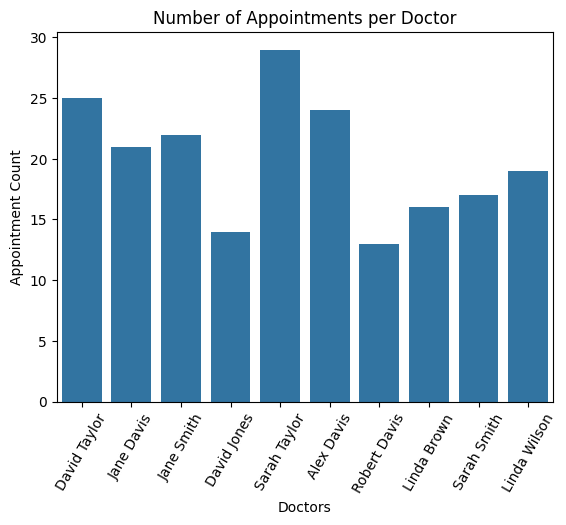

In [56]:
sns.barplot(x='doctor', y='total_appointments', data=g)
plt.title("Number of Appointments per Doctor")
plt.xlabel("Doctors")
plt.ylabel("Appointment Count")
plt.xticks(rotation=60)
plt.show()

<p style="text-align:left;color:skyblue;font-size:20px;"><b>Total billing amount collected by payment method.</b></p>

In [57]:
pd.read_sql("SELECT payment_method, SUM(amount) AS total_collected FROM billing GROUP BY payment_method;", conn)

,payment_method,total_collected
0,Cash,167707.14
1,Credit Card,201382.43
2,Insurance,182160.28


<p style="text-align:left;color:skyblue;font-size:20px;"><b>Number of treatments done per treatment type.</b></p>

In [58]:
pd.read_sql("SELECT treatment_type, COUNT(*) AS total_treatments FROM treatments GROUP BY treatment_type;", conn)

,treatment_type,total_treatments
0,Chemotherapy,49
1,ECG,38
2,MRI,36
3,Physiotherapy,36
4,X-Ray,41


<p style="text-align:left;color:skyblue;font-size:20px;"><b>List of patients who registered after 1st Jan 2023.</b></p>

In [59]:
pd.read_sql("SELECT * FROM patients WHERE registration_date > '01-01-2023';", conn)

,patient_id,first_name,last_name,gender,date_of_birth,contact_number,address,registration_date,insurance_provider,insurance_number,email
0,P001,David,Williams,F,1955-06-04 00:00:00,6939585183,789 Pine Rd,2022-06-23 00:00:00,WellnessCorp,INS840674,david.williams@mail.com
1,P002,Emily,Smith,F,1984-10-12 00:00:00,8228188767,321 Maple Dr,2022-01-15 00:00:00,PulseSecure,INS354079,emily.smith@mail.com
2,P003,Laura,Jones,M,1977-08-21 00:00:00,8397029847,321 Maple Dr,2022-02-07 00:00:00,PulseSecure,INS650929,laura.jones@mail.com
3,P004,Michael,Johnson,F,1981-02-20 00:00:00,9019443432,123 Elm St,2021-03-02 00:00:00,HealthIndia,INS789944,michael.johnson@mail.com
4,P005,David,Wilson,M,1960-06-23 00:00:00,7734463155,123 Elm St,2021-09-29 00:00:00,MedCare Plus,INS788105,david.wilson@mail.com
5,P006,Linda,Jones,M,1963-06-16 00:00:00,7561777264,321 Maple Dr,2022-10-02 00:00:00,HealthIndia,INS613758,linda.jones@mail.com
6,P007,Alex,Johnson,F,1989-06-08 00:00:00,6278710077,789 Pine Rd,2021-12-25 00:00:00,MedCare Plus,INS465890,alex.johnson@mail.com
7,P008,David,Davis,F,1976-07-05 00:00:00,7090558393,456 Oak Ave,2021-05-25 00:00:00,WellnessCorp,INS545101,david.davis@mail.com
8,P009,Laura,Davis,M,1971-12-11 00:00:00,7060324619,321 Maple Dr,2022-09-18 00:00:00,PulseSecure,INS136631,laura.davis@mail.com
9,P010,Michael,Taylor,M,2001-10-13 00:00:00,7081396733,123 Elm St,2022-08-24 00:00:00,WellnessCorp,INS866577,michael.taylor@mail.com


<p style="text-align:left;color:skyblue;font-size:20px;"><b>Patients who had more than 2 appointments.</b></p>

In [60]:
pd.read_sql("SELECT patient_id FROM appointments GROUP BY patient_id HAVING COUNT(*) > 2;", conn)

,patient_id
0,P001
1,P002
2,P005
3,P007
4,P009
5,P010
6,P012
7,P013
8,P014
9,P016


<p style="text-align:left;color:skyblue;font-size:20px;"><b>List of names of patients along with the doctor who treated them.</b></p>

In [61]:
pd.read_sql("SELECT p.first_name AS patient_name, d.first_name AS doctor_name, a.appointment_datetime FROM appointments a JOIN patients p ON a.patient_id = p.patient_id JOIN doctors d ON a.doctor_id = d.doctor_id;", conn)

,patient_name,doctor_name,appointment_datetime
0,Alex,Sarah,2023-08-09 15:15:00
1,Alex,David,2023-06-09 14:30:00
2,Emily,David,2023-06-28 08:00:00
3,Robert,Alex,2023-09-01 09:15:00
4,Emily,Jane,2023-07-06 12:45:00
...,...,...,...
195,Linda,Alex,2023-10-26 09:45:00
196,David,Sarah,2023-04-01 13:30:00
197,John,Alex,2023-05-15 08:30:00
198,Jane,David,2023-05-01 12:45:00


<p style="text-align:left;color:skyblue;font-size:20px;"><b>The highest billed amount for each payment method.</b></p>

In [62]:
pd.read_sql("SELECT payment_method, MAX(amount) AS highest_bill FROM billing GROUP BY payment_method;", conn)

,payment_method,highest_bill
0,Cash,4973.63
1,Credit Card,4964.71
2,Insurance,4966.18


<p style="text-align:left;color:skyblue;font-size:20px;"><b>List of all treatments and their associated patient names.</b></p>

In [63]:
pd.read_sql("SELECT t.treatment_type, p.first_name, t.treatment_date FROM treatments t JOIN appointments a ON t.appointment_id = a.appointment_id JOIN patients p ON a.patient_id = p.patient_id;", conn)

,treatment_type,first_name,treatment_date
0,Chemotherapy,Alex,2023-08-09 00:00:00
1,MRI,Alex,2023-06-09 00:00:00
2,MRI,Emily,2023-06-28 00:00:00
3,MRI,Robert,2023-09-01 00:00:00
4,ECG,Emily,2023-07-06 00:00:00
...,...,...,...
195,Chemotherapy,Linda,2023-10-26 00:00:00
196,Physiotherapy,David,2023-04-01 00:00:00
197,ECG,John,2023-05-15 00:00:00
198,Chemotherapy,Jane,2023-05-01 00:00:00


<p style="text-align:left;color:skyblue;font-size:20px;"><b>Patients who have never had an appointment.</b></p>

In [64]:
pd.read_sql("SELECT p.first_name, p.last_name FROM patients p LEFT JOIN appointments a ON p.patient_id = a.patient_id WHERE a.appointment_id IS NULL;", conn)

,first_name,last_name
0,Linda,Jones
1,Sarah,Johnson


<p style="text-align:left;color:skyblue;font-size:20px;"><b>Total billing amount for each month.</b></p>

In [65]:
g1 = pd.read_sql("SELECT strftime('%Y-%m', bill_date) AS billing_month,SUM(amount) AS total_revenue FROM billing GROUP BY billing_month ORDER BY billing_month;", conn)
g1

,billing_month,total_revenue
0,2023-01,58701.23
1,2023-02,36669.69
2,2023-03,47304.29
3,2023-04,64271.54
4,2023-05,48791.05
5,2023-06,56887.82
6,2023-07,39880.19
7,2023-08,41958.67
8,2023-09,33426.53
9,2023-10,43314.15


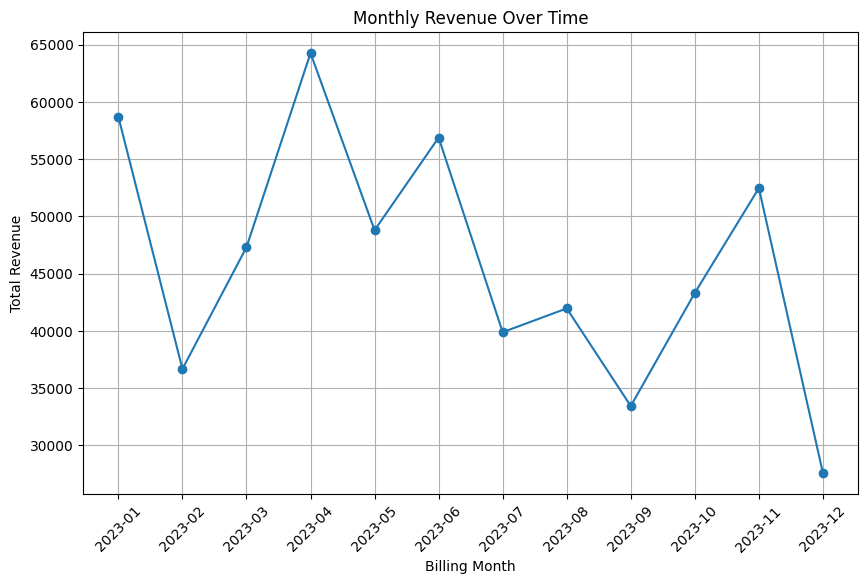

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(g1['billing_month'], g1['total_revenue'], marker='o', linestyle='-')
plt.title("Monthly Revenue Over Time")
plt.xlabel("Billing Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<p style="text-align:left;color:skyblue;font-size:20px;"><b>The proportion of total treatment cost contributed by each reason for visit.</b></p>

In [67]:
g2 = pd.read_sql("SELECT a.reason_for_visit,t.cost FROM appointments a, treatments t WHERE a.appointment_id = t.appointment_id GROUP BY a.reason_for_visit;", conn)
g2

,reason_for_visit,cost
0,Checkup,1381.00
1,Consultation,3731.55
2,Emergency,582.05
3,Follow-up,4541.14
4,Therapy,3941.97


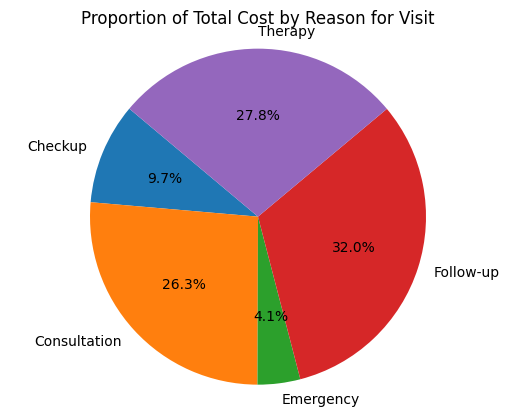

In [68]:
plt.pie(g2['cost'], labels=g2['reason_for_visit'], autopct='%1.1f%%', startangle=140)
plt.title("Proportion of Total Cost by Reason for Visit")
plt.axis('equal')  
plt.show()